<br>

# CUNY DATA 620 Week 8 Assignment

**March 27, 2022**

*Bonnie Cooper, George Cruz Deschamps, Rob Hodde*

<br>

## 1. Choose a corpus of interest.

We will look at the NLTK *text3: The Book of Genesis*.  

We use the NLTK library to access the text:

In [1]:
# libraries used
import nltk
from nltk.book import *
from nltk.corpus import stopwords
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from random import sample
from wordcloud import WordCloud

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
gen_all = text3  #text3 is the King James version of the book of Genesis (Bible)

Since this is a religious text, we are interested in this book's concept of deity, from a machine's point of view. Using the *similar* function, we find the words most similar to "God" in the text:

In [3]:
gen_all.similar("God")  #shows what word means in the text

he joseph pharaoh jacob they abraham she isaac sarah them him it i me
abram laban thee cain esau judah


Of the twenty similar words, nineteen refer to people, as opposed to other lifeforms, or planetary / star structures.  Genesis speaks of people being fashioned in the image of God, but the similarity function suggests that the account may be written in an anthropocentric way.  We could speculate how an android might form an understanding of God through this book. Would they think of God as a kind of super-consciousness surrounding (mostly male) humans? It's interesting to ask if a machine were to be taught the concept of God solely via the Genesis account, would it be a strong example of selection bias?


<br>

## 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

We will remove special characters and insignificant words (stopwords) from the text and then count the number of unique words remaining.

In [4]:
gen = [w.lower() for w in gen_all if w.isalpha() and w not in stopwords.words('english')] #remove special characters and numbers
total_words = len(gen)  #get a raw count of significant words in the text
gen_set = set(gen) #creates one copy of each unique word
len(gen_set), total_words  #counts number of unique words vs total words

(2556, 20583)

There are 2,556 significant unique words in the text. These words occur 20,583 times.


<br>

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

We will create a Frequency Distribution, then count words starting from the most common, until we reach the half-way point:

In [5]:
fdist = nltk.FreqDist([word for word in gen]) #counts how many times each word occurs in text
df = pd.DataFrame(fdist.most_common(len(gen_set)),columns=['word','counts'])  #create a dataframe of the top 2000 words

words = 0
distinct_count = 0
for i in range(len(df)):
    #print(df.iloc[i,0], df.iloc[i,1])
    words += df.iloc[i, 1]
    distinct_count = i
    if words > total_words/2:
        break

print(i, words, total_words) 

83 10304 20583


The eighty-three most common words occur a total of 10,304 times, which is a bit over half of the total occurrences (20583) of significant words. 

<br>

## 4. Identify the 200 highest frequency words in this corpus.

We again use the Frequency Distribution to select the Top 200 most common words, then display them:

In [6]:
#count the number of occurrences of the top 200 words
fdist = nltk.FreqDist([word for word in gen]) #counts how many times each word occurs in text
fdist200 = pd.DataFrame(fdist.most_common(200),columns=['word','counts'])  #create a dataframe of the top 200 rows only
words_list = fdist200.word.to_list()

print( 'List of top 200 words: ' )
print( words_list )

List of top 200 words: 
['and', 'unto', 'i', 'said', 'thou', 'thy', 'shall', 'thee', 'god', 'lord', 'father', 'land', 'jacob', 'came', 'joseph', 'son', 'sons', 'upon', 'abraham', 'behold', 'man', 'earth', 'went', 'wife', 'years', 'name', 'called', 'ye', 'let', 'us', 'every', 'brother', 'pharaoh', 'also', 'hand', 'pass', 'house', 'took', 'hath', 'brethren', 'saying', 'go', 'isaac', 'come', 'shalt', 'egypt', 'esau', 'day', 'made', 'one', 'give', 'begat', 'men', 'children', 'days', 'hundred', 'brought', 'seed', 'abram', 'saw', 'hast', 'bare', 'two', 'seven', 'laban', 'take', 'daughters', 'cattle', 'the', 'well', 'bring', 'make', 'gave', 'pray', 'face', 'eat', 'therefore', 'place', 'blessed', 'daughter', 'old', 'good', 'field', 'sent', 'rachel', 'forth', 'may', 'canaan', 'put', 'city', 'noah', 'servant', 'spake', 'israel', 'thing', 'lived', 'yet', 'then', 'but', 'found', 'eyes', 'servants', 'away', 'sarah', 'done', 'people', 'told', 'way', 'born', 'died', 'leah', 'waters', 'great', 'set', 

A truncated list of the most common significant words is listed above. The full list is shown below in the X-Axis labels. 

<br>

## 5. Create a graph that shows the relative frequency of these 200 words.

Here we show a series of visualizations that depict the relative frequency of the top 200 words form the Genesis corpus.  

To facilitate interpretability, we will display the frequency as a percentage from the total text as opposed to the absolute number of word occurances. The following code will perform this calculation on the `nltk.FreqDist` object recast as a DataFrame: 

In [7]:
fdist_all = pd.DataFrame(fdist.items(),columns=['word','counts']) 
fdist200['percentage'] = 100*fdist200['counts']/fdist_all['counts'].sum()
fdist200['csum'] = fdist200['percentage'].cumsum()
fdist200.head()

,word,counts,percentage,csum
0,and,1250,6.072973,6.072973
1,unto,598,2.905310,8.978283
2,i,484,2.351455,11.329738
3,said,477,2.317446,13.647185
4,thou,284,1.379779,15.026964


### Relative Frequency of the 200 words

a very impractical approach!

In [8]:
xaxisfreq = 5
xticksint = np.arange(0, len(words_list)+1, xaxisfreq)
xzip = zip(xticksint, words_list[0::xaxisfreq] )
xaxislabels = [ str(idx)+') '+wrd for idx, wrd in xzip ]
style.use('dark_background')

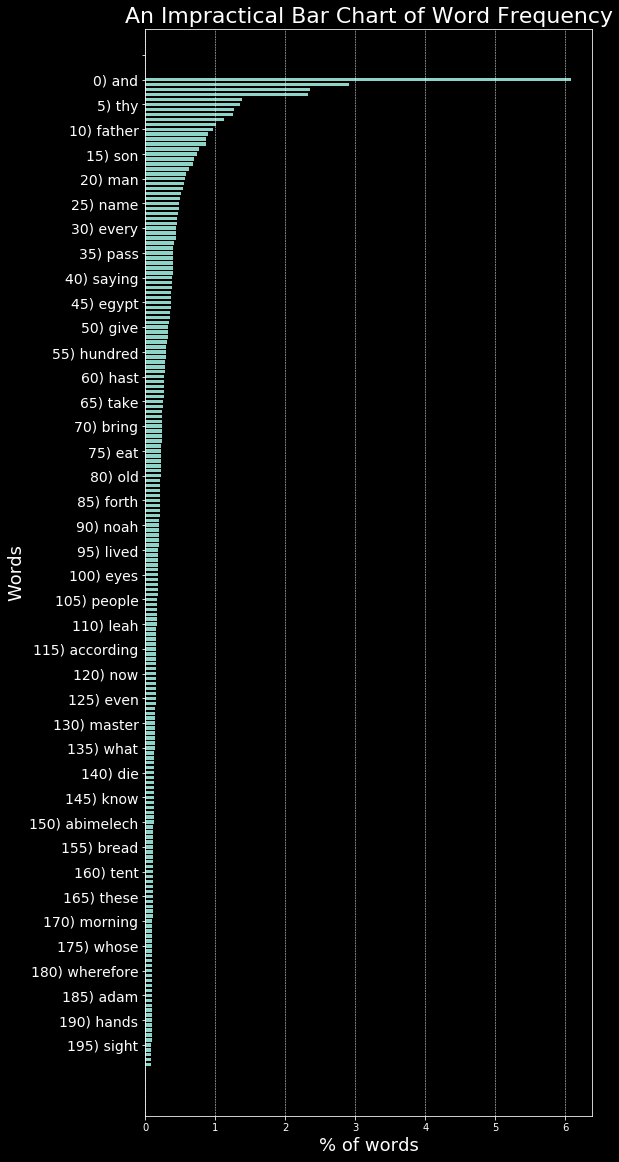

In [9]:
rxaxislabels = xaxislabels[::-1]
plt.figure(figsize=(8, 20)) 
sorted_df = fdist200.sort_values(by=['percentage'])
plt.title( 'An Impractical Bar Chart of Word Frequency', fontsize=22)
plt.xlabel('% of words', fontsize=18)
plt.ylabel('Words', fontsize=18)
plt.barh(y=sorted_df.word, width=sorted_df.percentage, height=0.7, align='center')
plt.yticks(ticks = xticksint+4, labels = rxaxislabels, fontsize=14)
plt.grid(axis = 'x',linestyle = '--', linewidth = 0.5)
plt.show()

As we can see, this is not the most practical way to visualize the relative frequency of all 200 top words. There is not practical way to simutaneously visualize the magnitude of the words relative frequency while visualizing the labels for all 200 words  

Let's try a different option...

### Relative Frequency of the 200 Words as a WordCloud

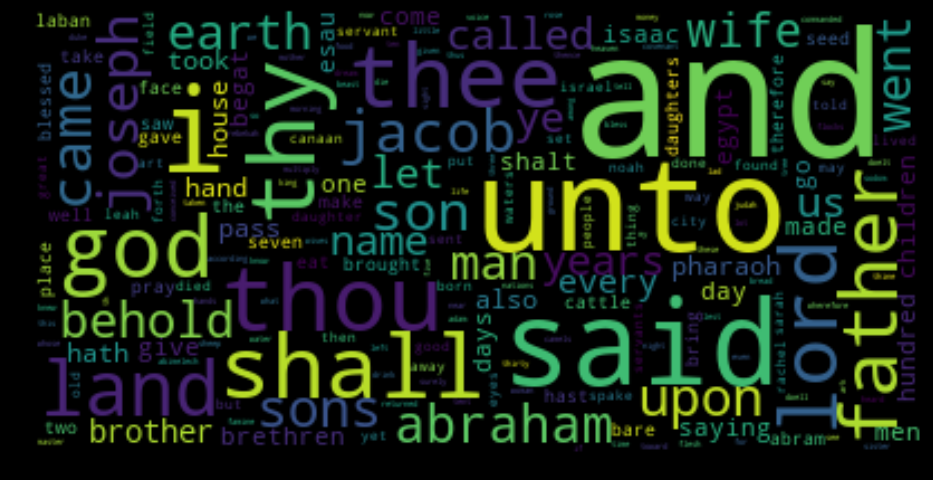

In [10]:
d = dict(zip(fdist200.word, fdist200.counts))

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The WordCloud figure shows each of the 200 words with the font size scaled to reflect the relative frequency of the word occurance throughout the Book of Genesis. This figure is much easier to visually digest than arranging the data as a horizontal bar chart. Do you agree?

### Cumulative Frequency of the 200 words

This visualization will show the cumulative frequency of the top 200 words

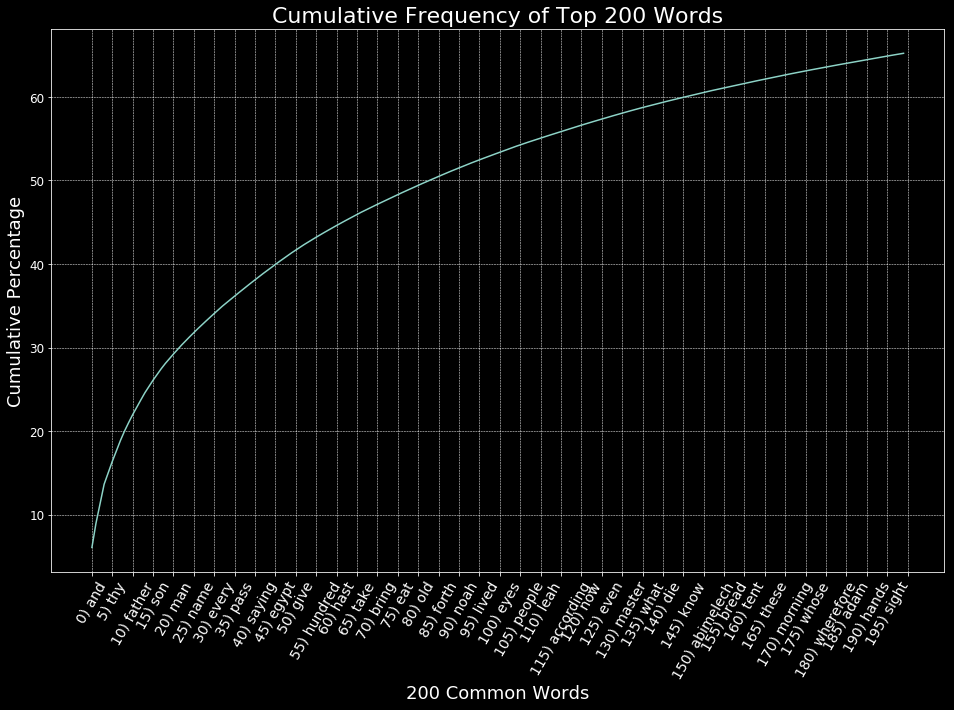

In [11]:
plt.figure(figsize=(16, 10)) 
plt.title('Cumulative Frequency of Top 200 Words', fontsize=22)
plt.xlabel('200 Common Words', fontsize=18)
plt.ylabel('Cumulative Percentage', fontsize=18)
plt.plot(fdist200['csum'])
plt.yticks(fontsize=12)
plt.xticks(ticks = xticksint, labels = xaxislabels, fontsize=14, rotation=60)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

This figure is quite informative! It visualizes the cumulative contributions of the 200 top words ordered by most frequent. We see that the figure verifies our earlier observation that by the 83rd most frequent word in the Book of Genesis corpus, we have already accounted for approximately half of the total words in the text. Furthermore, we can observe by the profile of the cumulative frequency curve, that the velocity of text accounted for tapers off as more words are added to the cumulative sum. For instance, the first 83 words account for ~50%, but in and adding another 100+ words, we account for ~66% of the total words; only an additional ~16%. This finding underscore the fact that the frequency of word occurances is very skewed: a select few words appear very often, while many more words appear relatively infrequently.

<br>

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that for many types of data, the rank-frequency distribution is an inverse relation. (https://en.wikipedia.org/wiki/Zipf%27s_law)

For our data this can be seen as true simply by looking at the chart above: the most frequently-occurring word is ranked number 1, the second-most frequently used word is ranked number 2, and so on.  This is the very definition of a frequency distribution and it cannot be otherwise.

A type of dataset where Zipf's law does not hold is in a binary condition: True/False, Male/Female, On/Off, and so on. 



<br>

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

We can borrow the "unusual words" function from Chapter 2 of the text to discover something different about this text from "all words in all corpora." 

In [12]:
from random import sample
def unusual_words(text):
    text_vocab  = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

unusual = unusual_words(gen)
print( 'Number of Unusual Words: ', len( unusual ) )
print( 'A Random Sampling of 100 Unusual Words: ' )
print( sample(unusual,100) )

Number of Unusual Words:  944
A Random Sampling of 100 Unusual Words: 
['garmen', 'samlah', 'feebler', 'marriages', 'ruled', 'fatfleshed', 'euphrates', 'bulls', 'talked', 'naamah', 'purposing', 'sabtah', 'horites', 'bered', 'eri', 'methusael', 'erech', 'diklah', 'rams', 'loveth', 'togeth', 'longeth', 'wor', 'imagined', 'silv', 'faces', 'ezbon', 'raamah', 'speaketh', 'doth', 'zebul', 'windows', 'tubalcain', 'moab', 'hagar', 'havilah', 'wells', 'philistines', 'hou', 'ev', 'benam', 'anah', 'phuvah', 'zidon', 'masrekah', 'denied', 'faileth', 'appeared', 'hang', 'shur', 'ste', 'interpretations', 'potipherah', 'repenteth', 'keturah', 'shobal', 'tr', 'sto', 'yielded', 'cities', 'lahairoi', 'lamech', 'ears', 'cainan', 'curseth', 'midianites', 'honourable', 'hastened', 'shaveh', 'rephaims', 'communing', 'fleddest', 'possessi', 'plagues', 'heber', 'mehujael', 'thistles', 'tents', 'kenites', 'booths', 'milcah', 'huz', 'ashbel', 'sevens', 'ephron', 'jezer', 'fulfilled', 'kadmonites', 'captives', '

As may be expected, the most striking uniqueness of the Genesis account is in its proper nouns - the names of people and places.  Since the text is over 5,000 years old, we would not expect these names to occur frequently in contemporary corpora.